In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

Cross Validation Accuracy = 0.9706091816367266 +/- 0.007831725760185643


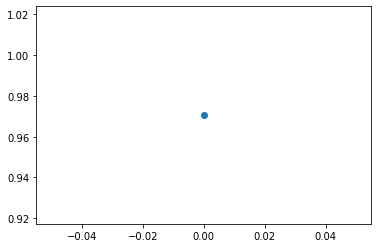

In [8]:
data = pd.read_csv('gender_classification_v7.csv')

#Read Data in and classify it into x and y variables
x = data[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = data[['gender']]

#Split the data into testing and training data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

#Set up and use the random forest model on the data that we just split
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train.loc[:, 'gender'].ravel())
pred = model.predict(x_test)

#Cross validation method
cv=10
scoring='accuracy'
cv_scores = cross_val_score(model, x, y.loc[:, 'gender'].ravel(), cv=cv, scoring=scoring)
print("Cross Validation Accuracy =", cv_scores.mean(), "+/-", cv_scores.std())
plt.plot(cv_scores.mean(), "o")

In [9]:
#Printing out accuracy metrics
print(model.score(x_test, y_test))
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print(accuracy_score(model.predict(x_test), y_test))

0.97002997002997
[[488  11]
 [ 19 483]]


              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       499
        Male       0.98      0.96      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

0.97002997002997
